# OCR (Optical Character Recognition)

### Importing Needed modules for OCR

In [18]:
# Importing Pillow that is used for lightweight image handling
from PIL import Image

# Importing OpenCV for heavywight image manipulation / handling
import cv2

## Importing tesseract for OCR( Optical Character Recognition)
import pytesseract

-----------------------------------------------------------------------

### First we are going to learn about Pillow Module

In [19]:

# Giving file path that we are going to work with. 
our_file = "/Users/coz/Downloads/page_01.jpg"

# Uploading image to our memory using Pillow module Image
im = Image.open(our_file)

# Viewing our image
im.show()

# We can rotate our image by using pillow and other simple image manipulation.
# im.rotate(degrees)
im.rotate(300).show()

# To save this rotated file we use: We saved it in desktop
im.save("/Users/coz/Desktop/page_01_rotated.jpg")

# This is all we neeed to know about Pillow as we will be using it only for lightweight image 
# manipulation tasks such as loading image crop image roatate image...

#### This is all we need to know about Pillow as we will be using it only for lightweight image manipulation. 
#### Light manipulation tasks such as loading image crop image roatate image...

----------------------------------------------------------------------

In [ ]:
# To know the path of our current directory for path of the image
import os
cwd = os.getcwd()
cwd

#  To insert Image in Jupyter select cell to markdown and above code..

<hr class="solid">

<img src="OCR/page_01-2.jpg" style="width:280px;height:224px">

#### Tessaract could directly OCR recognize the text of this image and convert it to raw text with 97% percentile accuracy but we want to do it with 100% accuracy which is wy we are learning the following.

<ol>
    <li> Inverted Images</li>
    <li> Rescaling </li>
    <li> Binarization </li>
    <li> Noise Removal </li>
    <li> Dilation and Erosion </li>
    <li> Rotation / Deskewing </li>
    <li> Removing Borders </li>
    <li> Missing Borders </li>
    <li> Transparency / Alpha Channel </li>
</ol>

<hr class="dashed">

## 2: OpenCV for heavyweight image manipulation

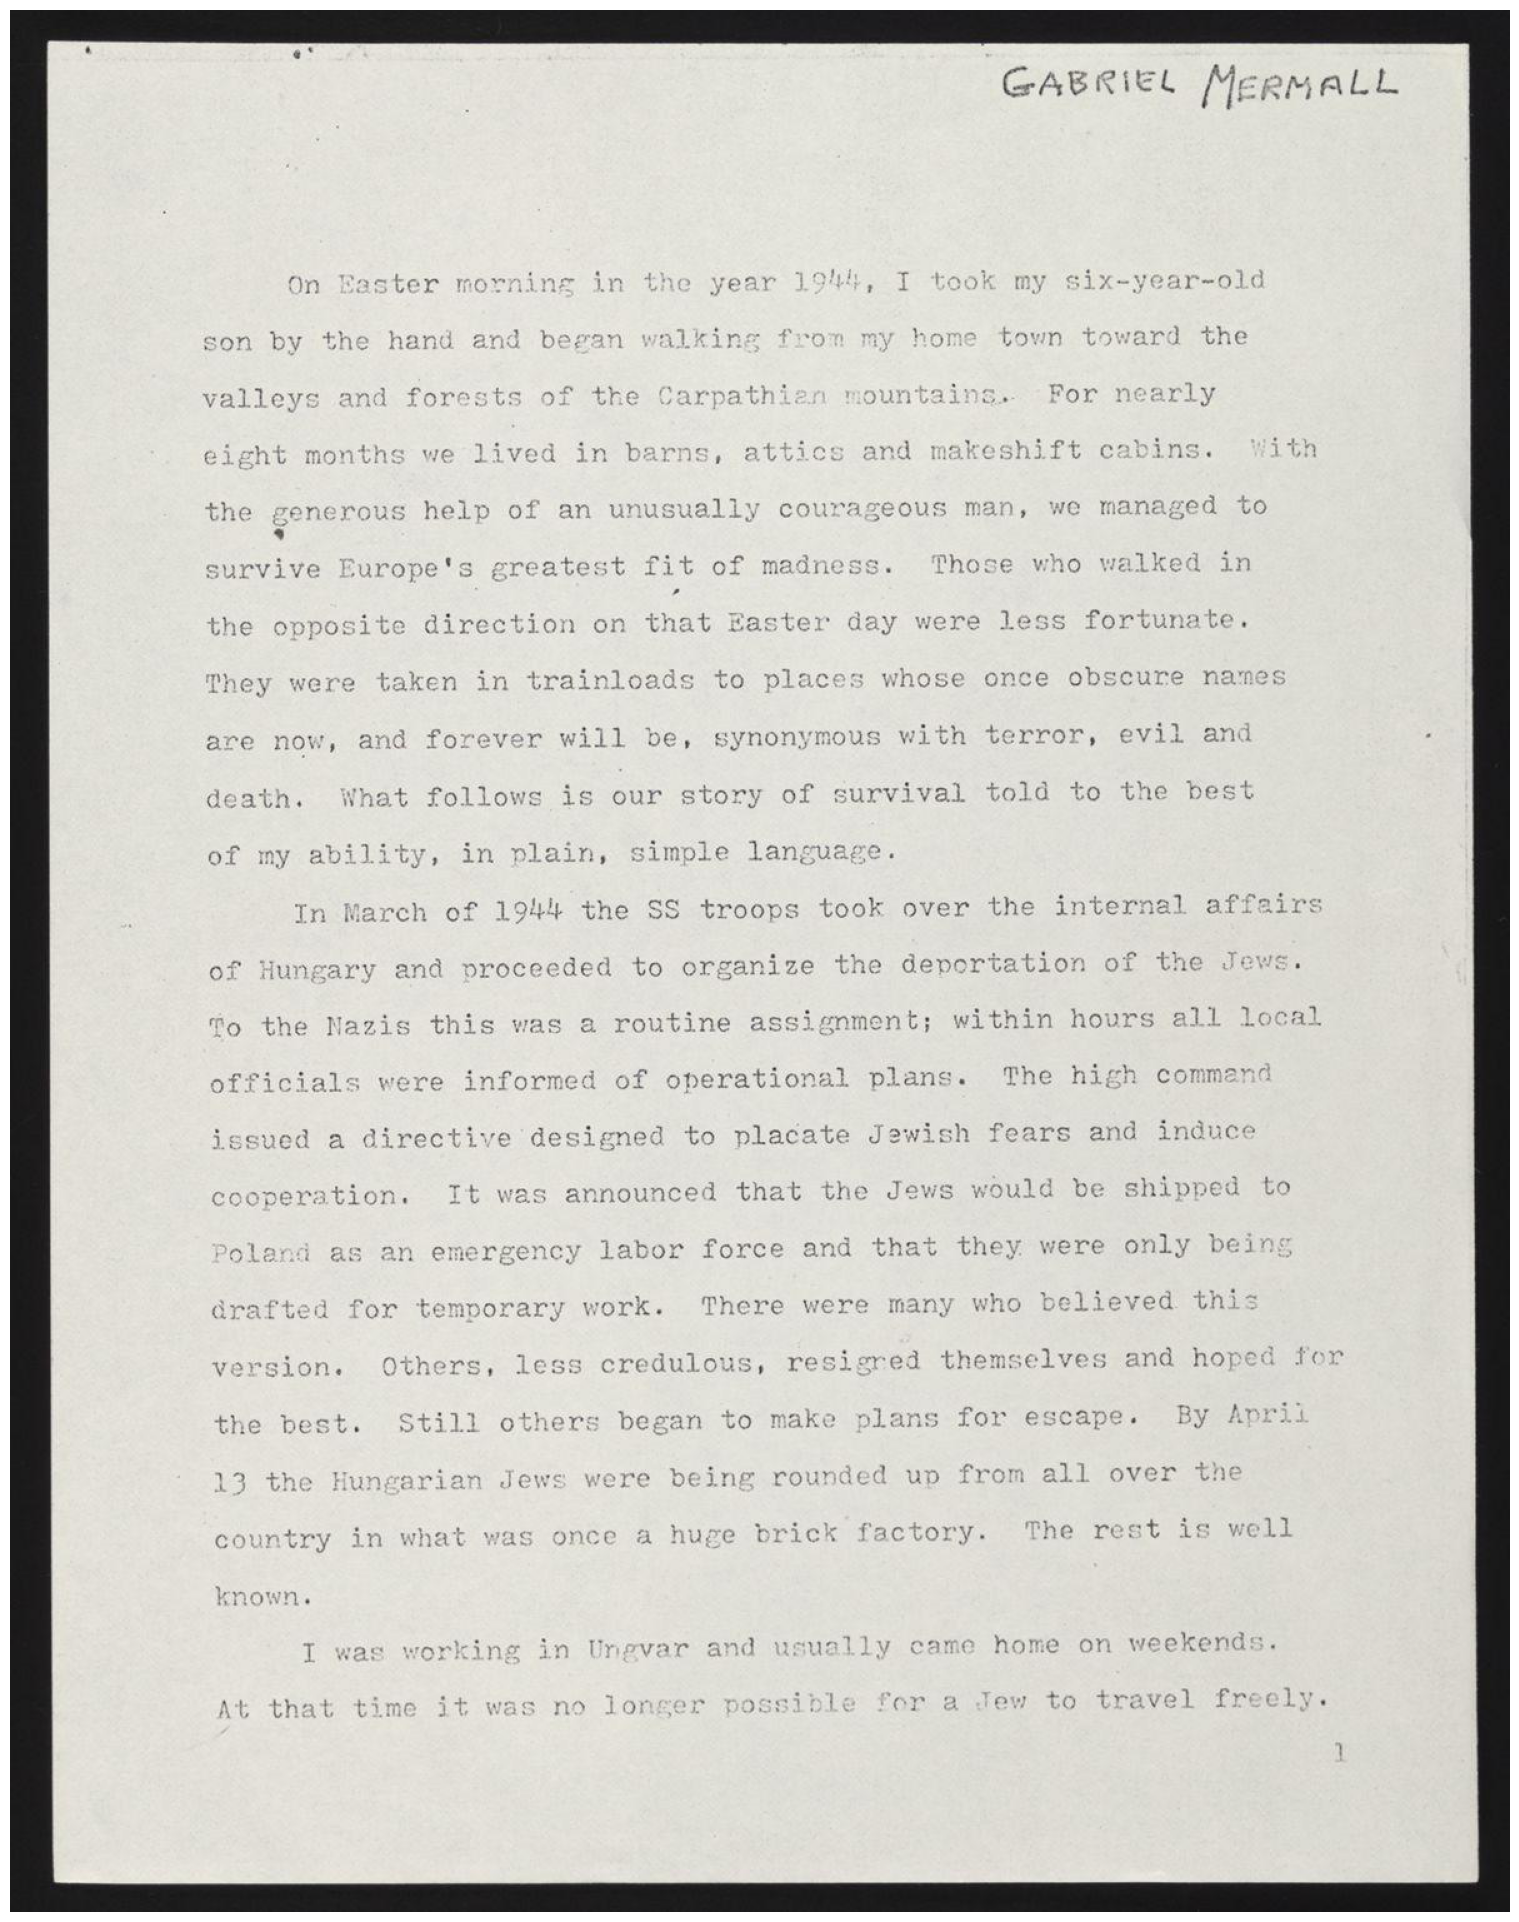

In [21]:
# Importing Opencv
import cv2

# We are importing matplotlib here as we want to show our picture without glitching
# This can be done with the help of Matlab
from matplotlib import pyplot as plt

# Giving Image path
image_file = '/Users/coz/Downloads/page_01.jpg'

# =============================================================================

 ## Making OpenCV read our image so that we can manipulate it using OpenCV 
img = cv2.imread(image_file)
 
 ## Displaying image using OPENCV 
 #           ["Title" ,     image_path]
# cv2.imshow("Orignal Image" , img)
 
 ## Holding image to display for 100 miliseconds. Change according to your needds.
# cv2.waitKey(100)

# =============================================================================

# Here you will see that computer glitches when we open our image. 
# So inorder to prevent this:
# We use matplotlib to diplay the image inside here. 

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()
    
# Calling our function with our image path
display(image_file)

###### After OpenCV has read the file we can now finally start manipulating the images:

<hr class="solid">

### 1. Inverting Image

Let's say we have a white background and a black text. If we invert an image then the black background will turn to white and white text will turn to black.

Now lets invert the image:

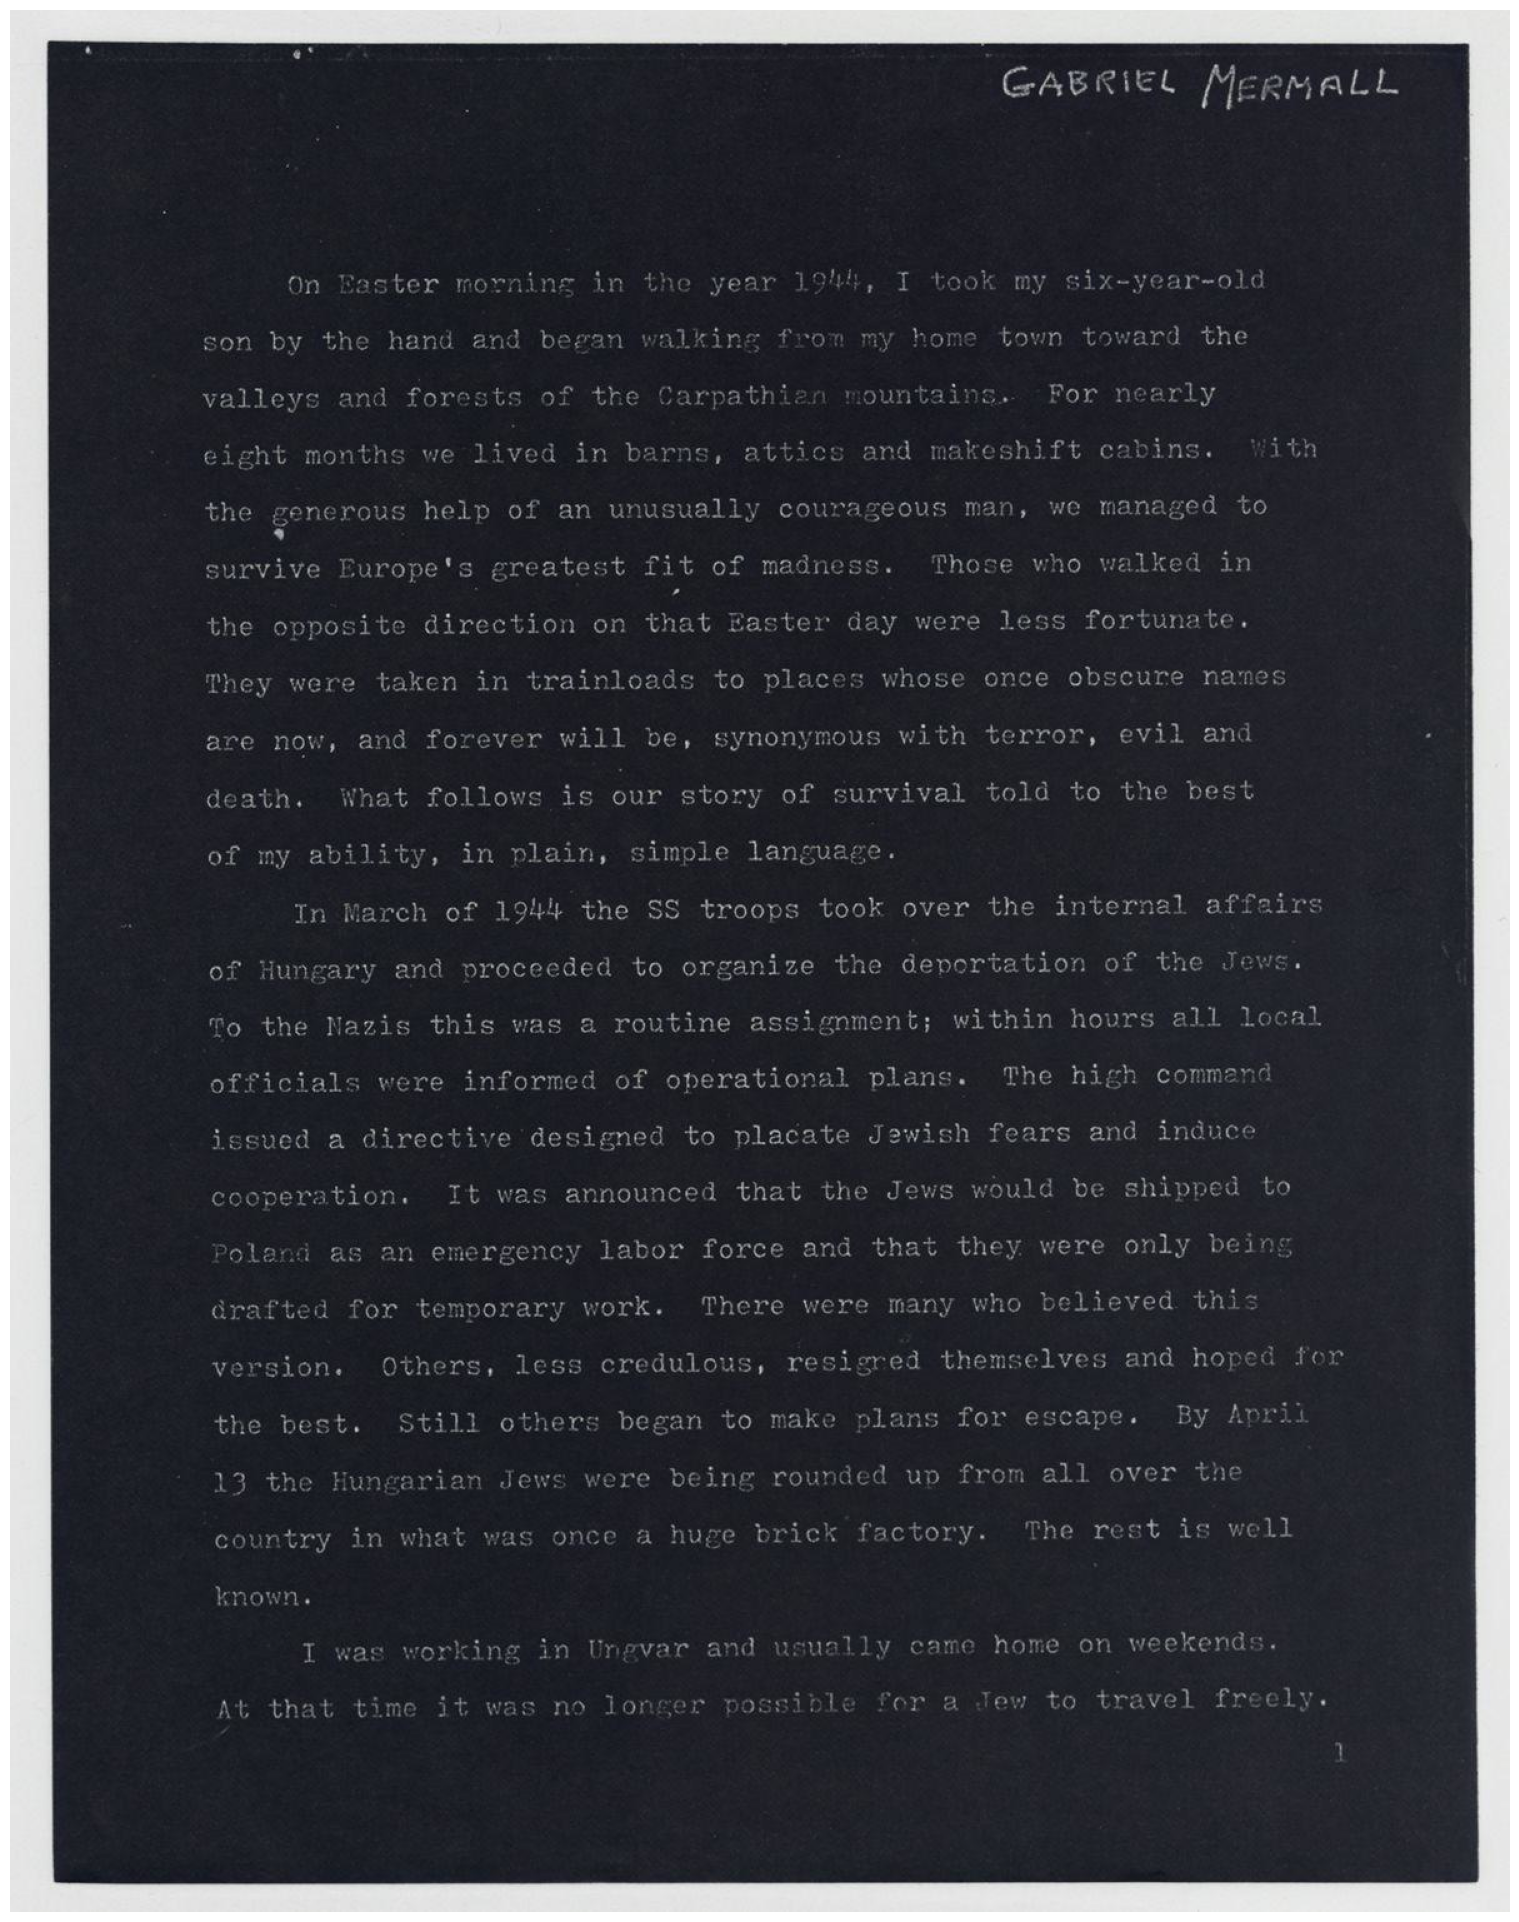

In [25]:
# Image path
image_file = '/Users/coz/Downloads/page_01.jpg'
img = cv2.imread(image_file)

# Built in way of OpenCV to invert an image using bitwise_not
inverted_image = cv2.bitwise_not(img)

# Save the resulting image
cv2.imwrite("/Users/coz/Downloads/page_01.jpg", inverted_image)
    
# Displaying our inverted image
display("/Users/coz/Downloads/page_01.jpg")

<hr class="solid">

## Rescaling

<em>Rescaling an image is essential for Optical Character Recognition (OCR) because it helps standardize the size and aspect ratio of the input images, making it easier for the OCR algorithm to recognize the text accurately.</em>

In other words , Rescaling an image in OCR (Optical Character Recognition) is like making sure all the words are in the same size so the computer can understand them better.

<b>Here is a simple code to rescale an image using OpenCV:</b>

In [ ]:
# Load the image
img = cv2.imread("/Users/coz/Downloads/page_01.jpg")

# Rescale the image to 50% of its original size
rescaled_img = cv2.resize(img, None, fx=0.5, fy=0.5)

# Display the original and rescaled images
cv2.imshow("Original Image", img)
cv2.imshow("Rescaled Image", rescaled_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In this code:

- **`cv2.resize()`** is used to make the picture smaller.
- **`fx`** and **`fy`** are like zoom buttons: they make the picture smaller or bigger. Here, they are set to 0.5, which makes the picture half the size it was before.

<img src="/OCR/Rescaling_Image.png" > </img>

<hr class="solid">

## Binarization

<em> Binarization of an image is the process of converting it into a binary image, meaning an image that consists of only two colors, typically black and white. In the context of OCR (Optical Character Recognition), binarization is particularly important. It helps to separate text from the background, making it easier for the OCR algorithm to recognize the characters accurately. 

Before Biarization we need to convert pur image to grayscale as this makes it easier for the computer when converting to binary. </em>

In [ ]:
# Turning our image to grayscale as binarizaton needs grayscale images
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = grayscale(img)
cv2.imwrite("/Users/coz/Downloads/page_01.jpg", gray_image)  # Writing to our existing image file

# Displaying our Grayscale Image
display("/Users/coz/Downloads/page_01.jpg")

Lets now finally binarize the image

In [ ]:
# Binarizing image using OpenCV
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)

# Writing/modifying to our existing file
cv2.imwrite("/Users/coz/Downloads/page_01.jpg", im_bw)

# Displaying our ibinarized image
display("/Users/coz/Downloads/page_01.jpg")

<em>Adjust the above numbers to adjust<br> the threshold and to turn into more black and white.</em>

<img src='/OCR/Binarize.jpg'></img>

<hr class="solid">

## Noise Removal

We are using NumPy to create a little grid, like the squares on graph paper, but on a computer. In the noise removal function, we're using this grid to help clean up the picture. Think of it like playing connect the dots, but with squares. It helps us fix any little dots or speckles that might be on the picture.

In [ ]:
def noise_removal(image):
    # Numpy to create a grid in our image for removing small dots (noise removal)
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    
    image = cv2.dilate(image, kernel, iterations=1)  # Expand Image
    kernel = np.ones((1, 1), np.uint8) 
    image = cv2.erode(image, kernel, iterations=1)   # Shrink Image
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)  # Combine Image
    image = cv2.medianBlur(image, 3)  # Smooth Image
    return (image)


# Applying noise removal to our previous binarized image
no_noise = noise_removal(im_bw)

# Writng to our existing file
cv2.imwrite("/Users/coz/Downloads/page_01.jpg", no_noise)

# Displaying
display("/Users/coz/Downloads/page_01.jpg")

So it is not essential for us to remove noise all the time as it may erode our character as well. In this case I would not have reduced noise in my picture but there are some pictures that have too much noise and in there we must use our noise reduction .

<hr class="solid">

### Dilation(Thickening) and Erosion(thinning)

Here we saw that I became somewhat thin because of noise removal. So let's learn how to make text thin and thick using OpenCV.

### 1. Thinning Image text

 ###### Be Cautious when thinning image too much.

In [ ]:
def thin_font(image):
    import numpy as np
    
    # In order for us to erode and dilate we need to have text in white and background in black
    # Hence lets invert the image
    image = cv2.bitwise_not(image)
    
    # Drawing grid using numpy
    kernel = np.ones((2,2),np.uint8)
    
    # Thinning our texts.
    image = cv2.erode(image, kernel, iterations=1)
    
    # revert the text to black and background to white after erosion
    image = cv2.bitwise_not(image)
    return (image)
    
# Calling our Function
eroded_image = thin_font(no_noise)

# Writing to our current image file
cv2.imwrite("/Users/coz/Downloads/page_01.jpg", eroded_image)

# Displaying it.
display("/Users/coz/Downloads/page_01.jpg")

### Thickening Image Texts.

In [ ]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    
    # Same as above but here we write Dilate instead of erode to thick.
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)
    
# Calling our function
dilated_image = thick_font(no_noise)

# Writing to our current image file
cv2.imwrite("/Users/coz/Downloads/page_01.jpg", dilated_image)

# Finally Displaying it
display("/Users/coz/Downloads/page_01.jpg")

<hr class="solid">

Tesserract expects image to be vertically allied to convert to raw text. But what if we have image that’s rooted.

Dont worry we can vertically align using Python’s OpenCV.

<hr class="solid">

## Rotation / Deskewing (VIP)

Copying from internet the complex maths and Rectangle Boxes to vertically align image. This is real use of maths on machine learning creating rectangular boxes around the text ...

In [ ]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("/Users/coz/Downloads/Rotated.png", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

# Deskew image ~function to Vertically Aligning Image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)
    
# Calling function 
fixed = deskew(new)
cv2.imwrite("/Users/coz/Downloads/Rotated.png", fixed)

display("/Users/coz/Downloads/Rotated.png")

<em>To vertically align our image we should not have any borders which is why we will learn to remove borders next.</em>

So if there is a border in an image we cannot vertically align our image. Hence we have to learn to remove it.

<hr class="solid">

## Removing Borders

In [ ]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]              # Cropping our image
    return (crop)
    
# Making object and passing function to it
no_borders = remove_borders(no_noise)
cv2.imwrite("imagpath/name.jpg")
display("imagpath/name.jpg")

<hr class="solid">

Lets learn about how to add borders right now?

###### Why to add borders?

<em> मानौं कि हाम्रो A पानाको एकदमै तल थियो। त्यसैले यसको कारणले हाम्रो Tesseract A लाई Raw Text ma convert गर्न स्पष्ट रूपमा देख्न सक्दैन। </em>

The models were trained with borders so if there is none borders then there will be a problem to convert to raw text for Tesseract.

<hr class="solid">

## Adding Borders

In [ ]:
# Adding color to a border: white in this case [R,G,B]
color = [255, 255, 255]

# Creating border of 150*4 of all sides
top, bottom, left, right = [150]*4

# Making a Border using OPenCV
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("image_path/name.jpg", image_with_border)
display("image_path/name.jpg")

<hr class="solid">

##### Now comes the tesseract the fun part to convert image text to raw text

## Tesseract Basics

In [ ]:
import pytesseract


# Orignal Image without manipulation
img_file = "/Users/coz/Downloads/page_01-2.jpg"

# Image with OpenCV Manipulation
no_noise = "/Users/coz/Downloads/Noise_removal.png"

# opening image that is not manipulated
orignal_img = Image.open(img_file)

# opening image that is not manipulated using openCV
Manipulated_img = Image.open(no_noise)

# We will notice that there is no output as our image has not been manipulated
# This is because the background and text are not well manipulated for tesseract to distinguish
ocr_result0 = pytesseract.image_to_string(orignal_img)
print(ocr_result0)

# Horray we succesfully converted the image text to text.
ocr_result1 = pytesseract.image_to_string(Manipulated_img)
print(ocr_result1)